RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

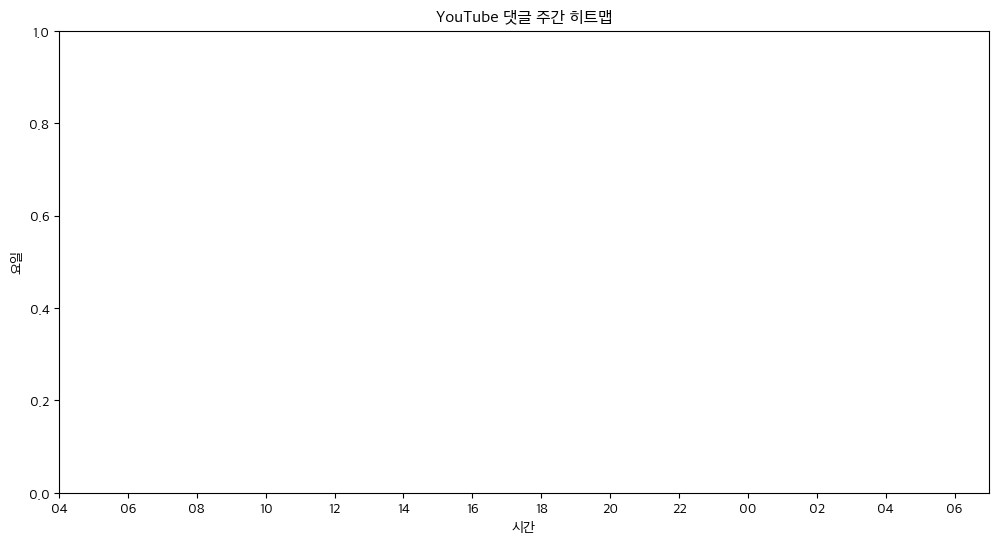

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.font_manager as fm
from pytz import timezone

# Mac에서 사용 가능한 한글 폰트 설정
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# # CSV 파일들이 있는 디렉토리 경로
# directories = ['디저스', '입시맘', '티처스 외전 및 티저']

# # 각 카테고리별 주중/주말 시간대 댓글 수를 저장할 딕셔너리
# category_day_hour_counts = {
#     category: {
#         'Weekday': [0] * 24,
#         'Weekend': [0] * 24
#     } for category in directories
# }

# # UTC를 KST로 변환하는 함수
# def utc_to_kst(utc_time):
#     utc = timezone('UTC')
#     kst = timezone('Asia/Seoul')
#     utc_dt = utc.localize(datetime.strptime(utc_time, '%Y-%m-%dT%H:%M:%SZ'))
#     kst_dt = utc_dt.astimezone(kst)
#     return kst_dt

# # 모든 CSV 파일에서 데이터 읽기
# for directory in directories:
#     if not os.path.exists(directory):
#         print(f"경고: '{directory}' 디렉토리를 찾을 수 없습니다.")
#         continue
#     for filename in os.listdir(directory):
#         if filename.endswith('.csv'):
#             file_path = os.path.join(directory, filename)
#             try:
#                 df = pd.read_csv(file_path)
#                 if 'Published At' in df.columns:
#                     for timestamp in df['Published At']:
#                         try:
#                             kst_dt = utc_to_kst(timestamp)
#                             weekday = kst_dt.weekday()
#                             hour = kst_dt.hour
#                             if weekday < 5:  # 월-금
#                                 category_day_hour_counts[directory]['Weekday'][hour] += 1
#                             else:  # 토-일
#                                 category_day_hour_counts[directory]['Weekend'][hour] += 1
#                         except ValueError:
#                             print(f"경고: 잘못된 timestamp 형식 - {timestamp}")
#                 else:
#                     print(f"경고: '{file_path}' 파일에 'Published At' 열이 없습니다.")
#             except Exception as e:
#                 print(f"오류: '{file_path}' 파일을 읽는 중 문제가 발생했습니다: {str(e)}")

# 1. 일주일 타임테이블 구조 생성
def create_weekly_timetable():
    days = ['월', '화', '수', '목', '금', '토', '일']
    hours = list(range(4, 24)) + list(range(0, 4))
    timetable = pd.DataFrame(index=days, columns=hours)
    return timetable

# 2. 유튜브 댓글 데이터 파싱
def parse_comments(comments_data):
    comments = []
    for comment in comments_data.split('\n'):
        parts = comment.split(',')
        if len(parts) == 4:
            timestamp = parts[3].strip()
            comments.append(datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%SZ"))
    return comments

# 3. 댓글 시간을 타임테이블에 매핑
def map_comments_to_timetable(comments, timetable):
    for comment_time in comments:
        day = comment_time.strftime('%a')
        hour = comment_time.hour
        if hour < 4:
            hour += 24
        if day in timetable.index and hour in timetable.columns:
            timetable.at[day, hour] = timetable.at[day, hour] + 1 if pd.notnull(timetable.at[day, hour]) else 1

# 4. 산점도 시각화
def visualize_comments_heatmap(timetable):
    plt.figure(figsize=(12, 6))
    for day in timetable.index:
        for hour in timetable.columns:
            count = timetable.at[day, hour]
            if pd.notnull(count):
                plt.scatter(hour, day, s=count*20, alpha=0.5)
    
    plt.title('YouTube 댓글 주간 히트맵')
    plt.xlabel('시간')
    plt.ylabel('요일')
    plt.xlim(0, 27)
    plt.xticks(range(0, 28, 2), [f"{h%24:02d}" for h in range(4, 32, 2)])
    plt.colorbar(label='댓글 수')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 메인 실행 코드
comments_data = """
@ganadara9900,아 쇼츠 편집 너무 잘해..스포츠 보듯이 쫄리고 카타르시스 느껴지게 하는 느낌. 방송 봐아겠다,2,2023-12-13T12:02:16Z
@user-mh3cu3me7x,부럽다 방송이라도,4,2023-11-15T15:52:13Z
@user-xr3kv4kg7q,무려 정승제쌤이랑 조정식쌤 단독 코칭...진짜 좋은 기회네요,15,2023-11-10T03:54:28Z
@user-rj6nj5bg7q,오호.. 나도 시험 보고 싶다,10,2023-10-24T15:28:18Z
"""

timetable = create_weekly_timetable()
comments = parse_comments(comments_data)
map_comments_to_timetable(comments, timetable)
visualize_comments_heatmap(timetable)

print(timetable)

/var/folders/tx/bqy8rt1d26s6vhm2mlnw1lr80000gn/T/ipykernel_12321/3032085681.py:62: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  plt.tight_layout()
/Users/june/Desktop/DMF/3차 인사이트 워크샵/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  fig.canvas.print_figure(bytes_io, **kw)


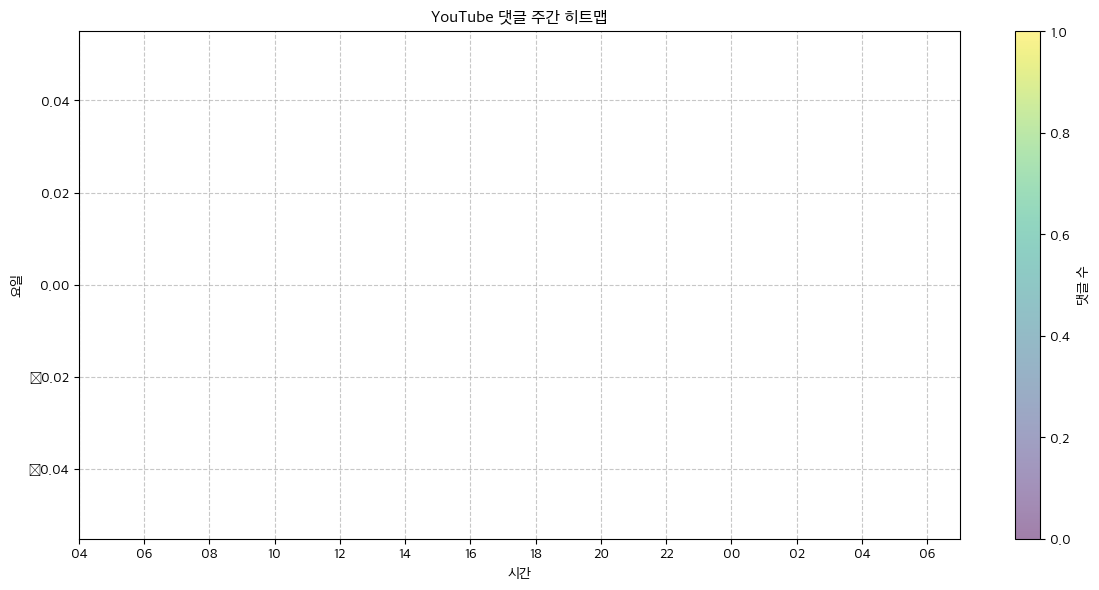

    4    5    6    7    8    9    10   11   12   13  ...   18   19   20   21  \
월  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
화  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
수  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
목  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
금  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
토  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
일  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

    22   23   0    1    2    3   
월  NaN  NaN  NaN  NaN  NaN  NaN  
화  NaN  NaN  NaN  NaN  NaN  NaN  
수  NaN  NaN  NaN  NaN  NaN  NaN  
목  NaN  NaN  NaN  NaN  NaN  NaN  
금  NaN  NaN  NaN  NaN  NaN  NaN  
토  NaN  NaN  NaN  NaN  NaN  NaN  
일  NaN  NaN  NaN  NaN  NaN  NaN  

[7 rows x 24 columns]


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# 1. 일주일 타임테이블 구조 생성
def create_weekly_timetable():
    days = ['월', '화', '수', '목', '금', '토', '일']
    hours = list(range(4, 24)) + list(range(0, 4))
    timetable = pd.DataFrame(index=days, columns=hours)
    return timetable

# 2. 유튜브 댓글 데이터 파싱
def parse_comments(comments_data):
    comments = []
    for comment in comments_data.split('\n'):
        parts = comment.split(',')
        if len(parts) == 4:
            timestamp = parts[3].strip()
            comments.append(datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%SZ"))
    return comments

# 3. 댓글 시간을 타임테이블에 매핑
def map_comments_to_timetable(comments, timetable):
    for comment_time in comments:
        day = comment_time.strftime('%a')
        hour = comment_time.hour
        if hour < 4:
            hour += 24
        if day in timetable.index and hour in timetable.columns:
            timetable.at[day, hour] = timetable.at[day, hour] + 1 if pd.notnull(timetable.at[day, hour]) else 1

# 4. 산점도 시각화
def visualize_comments_heatmap(timetable):
    plt.figure(figsize=(12, 6))
    for day in timetable.index:
        for hour in timetable.columns:
            count = timetable.at[day, hour]
            if pd.notnull(count):
                plt.scatter(hour, day, s=count*20, alpha=0.5)
    
    plt.title('YouTube 댓글 주간 히트맵')
    plt.xlabel('시간')
    plt.ylabel('요일')
    plt.xlim(0, 27)
    plt.xticks(range(0, 28, 2), [f"{h%24:02d}" for h in range(4, 32, 2)])
    # plt.colorbar(label='댓글 수')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 메인 실행 코드
comments_data = """
@ganadara9900,아 쇼츠 편집 너무 잘해..스포츠 보듯이 쫄리고 카타르시스 느껴지게 하는 느낌. 방송 봐아겠다,2,2023-12-13T12:02:16Z
@user-mh3cu3me7x,부럽다 방송이라도,4,2023-11-15T15:52:13Z
@user-xr3kv4kg7q,무려 정승제쌤이랑 조정식쌤 단독 코칭...진짜 좋은 기회네요,15,2023-11-10T03:54:28Z
@user-rj6nj5bg7q,오호.. 나도 시험 보고 싶다,10,2023-10-24T15:28:18Z
"""

timetable = create_weekly_timetable()
comments = parse_comments(comments_data)
map_comments_to_timetable(comments, timetable)
visualize_comments_heatmap(timetable)

print(timetable)

/var/folders/tx/bqy8rt1d26s6vhm2mlnw1lr80000gn/T/ipykernel_12321/3945011522.py:47: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  plt.tight_layout()
/Users/june/Desktop/DMF/3차 인사이트 워크샵/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  fig.canvas.print_figure(bytes_io, **kw)


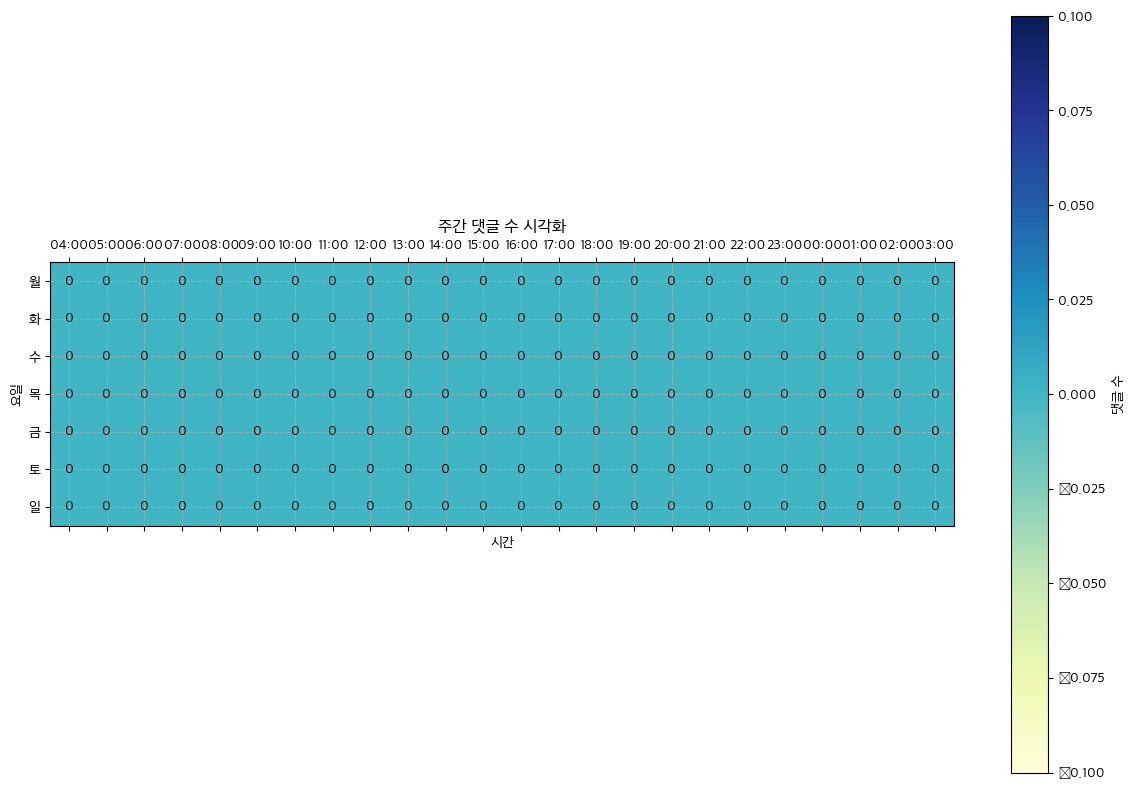

In [9]:
import numpy as np
# 1. 타임테이블 생성
def create_timetable():
    days = ['월', '화', '수', '목', '금', '토', '일']
    hours = list(range(4, 24)) + list(range(0, 4))
    timetable = {day: [0] * 24 for day in days}
    return timetable

# 2. 댓글 수를 타임테이블에 매핑
def map_comments_to_timetable(comments, timetable):
    for comment_time in comments:
        day = comment_time.strftime('%a')
        hour = comment_time.hour
        if hour < 4:
            hour += 24
        if day in timetable:
            timetable[day][hour] += 1

# 3. 시각화 함수
def visualize_timetable(timetable):
    days = ['월', '화', '수', '목', '금', '토', '일']
    hours = list(range(4, 24)) + list(range(0, 4))
    
    # 댓글 수 배열 준비
    counts = np.array([[timetable[day][hour] for hour in hours] for day in days])

    # 시각화
    fig, ax = plt.subplots(figsize=(12, 8))
    cax = ax.matshow(counts, cmap='YlGnBu')

    # x축, y축 레이블 설정
    ax.set_xticks(np.arange(len(hours)))
    ax.set_yticks(np.arange(len(days)))
    ax.set_xticklabels([f"{h:02d}:00" for h in hours])
    ax.set_yticklabels(days)

    # 각 셀에 댓글 수 표시
    for i in range(len(days)):
        for j in range(len(hours)):
            ax.text(j, i, counts[i, j], ha='center', va='center', color='black')

    plt.xlabel('시간')
    plt.ylabel('요일')
    plt.title('주간 댓글 수 시각화')
    plt.colorbar(cax, label='댓글 수')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 메인 실행 코드 예시
timetable = create_timetable()
comments_data = [
    # 실제 댓글 시간 데이터를 여기에 추가
]

map_comments_to_timetable(comments_data, timetable)
visualize_timetable(timetable)

/var/folders/tx/bqy8rt1d26s6vhm2mlnw1lr80000gn/T/ipykernel_12321/4224543091.py:50: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  plt.tight_layout()
/Users/june/Desktop/DMF/3차 인사이트 워크샵/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  fig.canvas.print_figure(bytes_io, **kw)


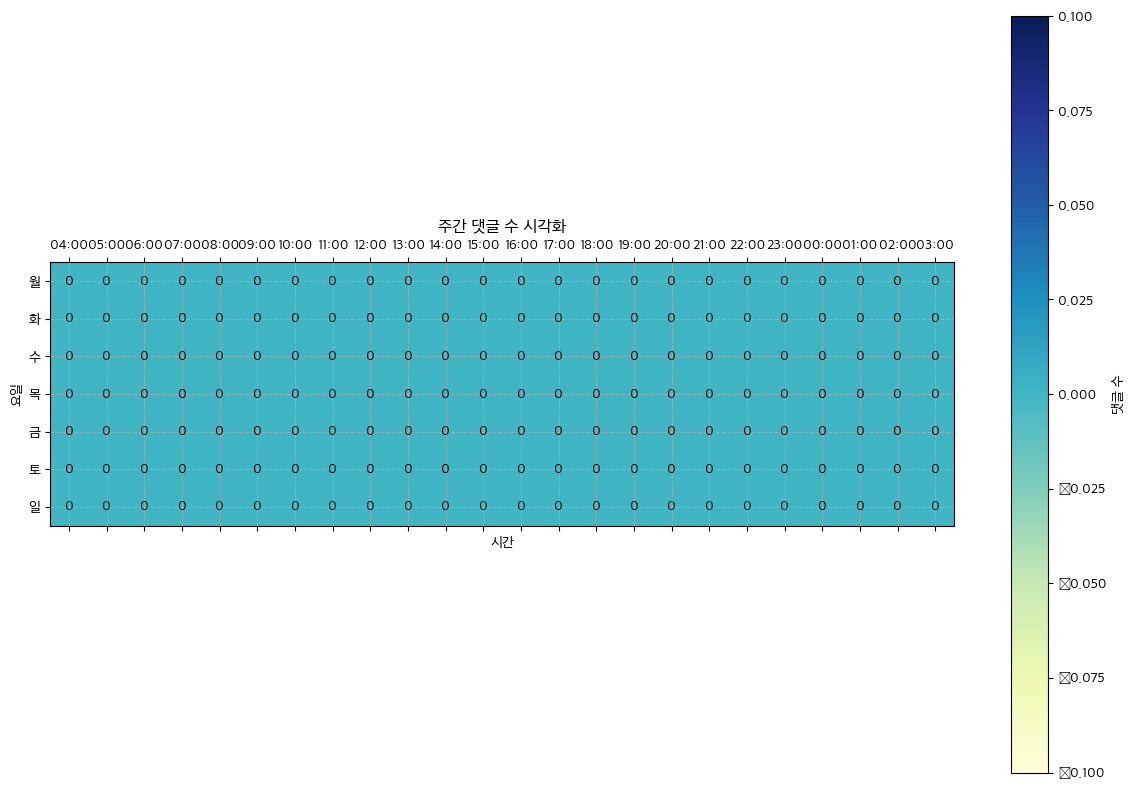

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# 1. 타임테이블 생성
def create_timetable():
    days = ['월', '화', '수', '목', '금', '토', '일']
    hours = list(range(4, 24)) + list(range(0, 4))
    timetable = {day: [0] * 24 for day in days}
    return timetable

# 2. 댓글 수를 타임테이블에 매핑
def map_comments_to_timetable(comments, timetable):
    for comment_time in comments:
        day = comment_time.strftime('%a')
        hour = comment_time.hour
        if hour < 4:
            hour += 24
        if day in timetable:
            timetable[day][hour] += 1

# 3. 시각화 함수
def visualize_timetable(timetable):
    days = ['월', '화', '수', '목', '금', '토', '일']
    hours = list(range(4, 24)) + list(range(0, 4))
    
    # 댓글 수 배열 준비
    counts = np.array([[timetable[day][hour] for hour in hours] for day in days])

    # 시각화
    fig, ax = plt.subplots(figsize=(12, 8))
    cax = ax.matshow(counts, cmap='YlGnBu')

    # x축, y축 레이블 설정
    ax.set_xticks(np.arange(len(hours)))
    ax.set_yticks(np.arange(len(days)))
    ax.set_xticklabels([f"{h:02d}:00" for h in hours])
    ax.set_yticklabels(days)

    # 각 셀에 댓글 수 표시
    for i in range(len(days)):
        for j in range(len(hours)):
            ax.text(j, i, counts[i, j], ha='center', va='center', color='black')

    plt.xlabel('시간')
    plt.ylabel('요일')
    plt.title('주간 댓글 수 시각화')
    plt.colorbar(cax, label='댓글 수')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 메인 실행 코드 예시
timetable = create_timetable()
comments_data = [
    # 실제 댓글 시간 데이터를 여기에 추가
]

map_comments_to_timetable(comments_data, timetable)
visualize_timetable(timetable)

In [10]:
# CSV 파일들이 있는 디렉토리 경로
directories = ['디저스', '입시맘', '티처스 외전 및 티저']

# 각 카테고리별 주중/주말 시간대 댓글 수를 저장할 딕셔너리
category_day_hour_counts = {
    category: {
        'Weekday': [0] * 24,
        'Weekend': [0] * 24
    } for category in directories
}

# UTC를 KST로 변환하는 함수
def utc_to_kst(utc_time):
    utc = timezone('UTC')
    kst = timezone('Asia/Seoul')
    utc_dt = utc.localize(datetime.strptime(utc_time, '%Y-%m-%dT%H:%M:%SZ'))
    kst_dt = utc_dt.astimezone(kst)
    return kst_dt

# 모든 CSV 파일에서 데이터 읽기
for directory in directories:
    if not os.path.exists(directory):
        print(f"경고: '{directory}' 디렉토리를 찾을 수 없습니다.")
        continue
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            try:
                df = pd.read_csv(file_path)
                if 'Published At' in df.columns:
                    for timestamp in df['Published At']:
                        try:
                            kst_dt = utc_to_kst(timestamp)
                            weekday = kst_dt.weekday()
                            hour = kst_dt.hour
                            if weekday < 5:  # 월-금
                                category_day_hour_counts[directory]['Weekday'][hour] += 1
                            else:  # 토-일
                                category_day_hour_counts[directory]['Weekend'][hour] += 1
                        except ValueError:
                            print(f"경고: 잘못된 timestamp 형식 - {timestamp}")
                else:
                    print(f"경고: '{file_path}' 파일에 'Published At' 열이 없습니다.")
            except Exception as e:
                print(f"오류: '{file_path}' 파일을 읽는 중 문제가 발생했습니다: {str(e)}")

# 1. 타임테이블 생성
def create_timetable():
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    hours = list(range(4, 24)) + list(range(0, 4))
    timetable = {day: [0] * 24 for day in days}
    return timetable

# 2. 댓글 수를 타임테이블에 매핑
def map_comments_to_timetable(df, timetable):
    df['Published At'] = pd.to_datetime(df['Published At'])
    for comment_time in df['Published At']:
        day = comment_time.strftime('%a')
        hour = comment_time.hour
        if hour < 4:
            hour += 24
        if day in timetable:
            timetable[day][hour] += 1

# 3. 시각화 함수
def visualize_timetable(timetable):
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    hours = list(range(4, 24)) + list(range(0, 4))
    
    # 댓글 수 배열 준비
    counts = np.array([[timetable[day][hour] for hour in hours] for day in days])

    # 시각화
    fig, ax = plt.subplots(figsize=(12, 8))
    cax = ax.matshow(counts, cmap='YlGnBu')

    # x축, y축 레이블 설정
    ax.set_xticks(np.arange(len(hours)))
    ax.set_yticks(np.arange(len(days)))
    ax.set_xticklabels([f"{h:02d}:00" for h in hours])
    ax.set_yticklabels(['월', '화', '수', '목', '금', '토', '일'])

    # 각 셀에 댓글 수 표시
    for i in range(len(days)):
        for j in range(len(hours)):
            ax.text(j, i, counts[i, j], ha='center', va='center', color='black')

    plt.xlabel('시간')
    plt.ylabel('요일')
    plt.title('주간 댓글 수 시각화')
    plt.colorbar(cax, label='댓글 수')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 메인 실행 코드
timetable = create_timetable()
map_comments_to_timetable(df, timetable)
visualize_timetable(timetable)

IndexError: list index out of range

In [15]:
# CSV 파일들이 있는 디렉토리 경로
directories = ['디저스', '입시맘', '티처스 외전 및 티저']

# 각 카테고리별 주중/주말 시간대 댓글 수를 저장할 딕셔너리
category_day_hour_counts = {
    category: {
        'Weekday': [0] * 24,
        'Weekend': [0] * 24
    } for category in directories
}

# UTC를 KST로 변환하는 함수
def utc_to_kst(utc_time):
    utc = timezone('UTC')
    kst = timezone('Asia/Seoul')
    utc_dt = utc.localize(datetime.strptime(utc_time, '%Y-%m-%dT%H:%M:%SZ'))
    kst_dt = utc_dt.astimezone(kst)
    return kst_dt

# 모든 CSV 파일에서 데이터 읽기
for directory in directories:
    if not os.path.exists(directory):
        print(f"경고: '{directory}' 디렉토리를 찾을 수 없습니다.")
        continue
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            try:
                df = pd.read_csv(file_path)
                if 'Published At' in df.columns:
                    for timestamp in df['Published At']:
                        try:
                            kst_dt = utc_to_kst(timestamp)
                            weekday = kst_dt.weekday()
                            hour = kst_dt.hour
                            if weekday < 5:  # 월-금
                                category_day_hour_counts[directory]['Weekday'][hour] += 1
                            else:  # 토-일
                                category_day_hour_counts[directory]['Weekend'][hour] += 1
                        except ValueError:
                            print(f"경고: 잘못된 timestamp 형식 - {timestamp}")
                else:
                    print(f"경고: '{file_path}' 파일에 'Published At' 열이 없습니다.")
            except Exception as e:
                print(f"오류: '{file_path}' 파일을 읽는 중 문제가 발생했습니다: {str(e)}")

category_day_hour_counts

{'디저스': {'Weekday': [16,
   14,
   10,
   8,
   5,
   2,
   4,
   7,
   8,
   14,
   18,
   14,
   12,
   22,
   18,
   15,
   14,
   23,
   15,
   13,
   19,
   20,
   22,
   26],
  'Weekend': [45,
   43,
   27,
   15,
   13,
   7,
   3,
   4,
   11,
   15,
   23,
   19,
   12,
   20,
   22,
   17,
   11,
   192,
   152,
   114,
   95,
   79,
   84,
   76]},
 '입시맘': {'Weekday': [18,
   5,
   8,
   1,
   0,
   2,
   5,
   6,
   19,
   36,
   24,
   22,
   10,
   18,
   16,
   10,
   8,
   12,
   11,
   17,
   20,
   17,
   17,
   18],
  'Weekend': [4,
   6,
   4,
   3,
   0,
   0,
   0,
   3,
   7,
   1,
   1,
   6,
   6,
   3,
   3,
   1,
   3,
   15,
   9,
   9,
   9,
   13,
   3,
   8]},
 '티처스 외전 및 티저': {'Weekday': [103,
   65,
   29,
   32,
   19,
   18,
   11,
   18,
   31,
   56,
   51,
   51,
   66,
   67,
   69,
   56,
   77,
   92,
   67,
   60,
   104,
   90,
   91,
   107],
  'Weekend': [25,
   15,
   14,
   13,
   4,
   5,
   2,
   10,
   15,
   30,
   15,
   18,
   23,
   

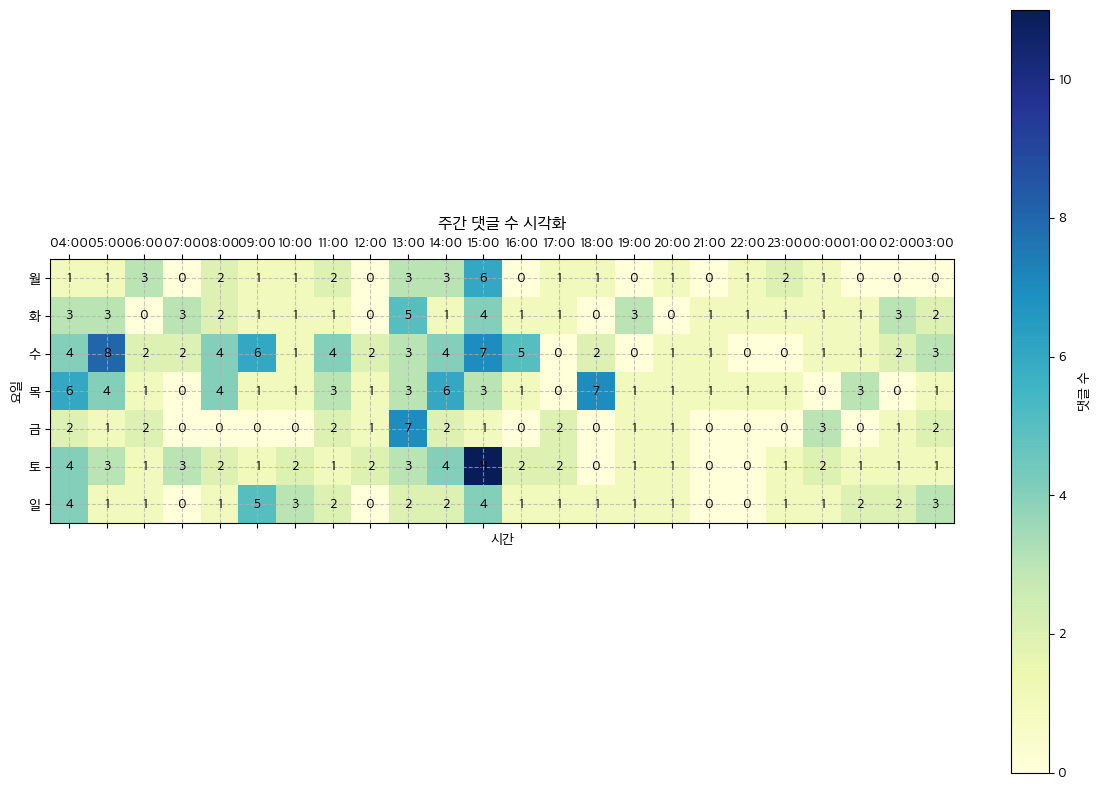

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# CSV 파일 읽기
df = pd.read_csv('티처스 외전 및 티저/jv3oaNyEFhM.csv')  # 파일경로를 실제 CSV 파일 경로로 변경하세요

# 1. 타임테이블 생성
def create_timetable():
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    hours = list(range(4, 24)) + list(range(0, 4))
    timetable = {day: [0] * 24 for day in days}
    return timetable

# 2. 댓글 수를 타임테이블에 매핑
def map_comments_to_timetable(df, timetable):
    df['Published At'] = pd.to_datetime(df['Published At'])
    for comment_time in df['Published At']:
        day = comment_time.strftime('%a')
        hour = comment_time.hour
        if hour < 4:
            hour += 24
        # 인덱스 범위를 벗어나지 않도록 조정
        if hour >= 24:
            hour -= 24
        if day in timetable:
            timetable[day][hour] += 1

# 3. 시각화 함수
def visualize_timetable(timetable):
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    hours = list(range(4, 24)) + list(range(0, 4))
    
    # 댓글 수 배열 준비
    counts = np.array([[timetable[day][hour] for hour in hours] for day in days])

    # 시각화
    fig, ax = plt.subplots(figsize=(12, 8))
    cax = ax.matshow(counts, cmap='YlGnBu')

    # x축, y축 레이블 설정
    ax.set_xticks(np.arange(len(hours)))
    ax.set_yticks(np.arange(len(days)))
    ax.set_xticklabels([f"{h:02d}:00" for h in hours])
    ax.set_yticklabels(['월', '화', '수', '목', '금', '토', '일'])

    # 각 셀에 댓글 수 표시
    for i in range(len(days)):
        for j in range(len(hours)):
            ax.text(j, i, counts[i, j], ha='center', va='center', color='black')

    plt.xlabel('시간')
    plt.ylabel('요일')
    plt.title('주간 댓글 수 시각화')
    plt.colorbar(cax, label='댓글 수')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 메인 실행 코드
timetable = create_timetable()
map_comments_to_timetable(df, timetable)
visualize_timetable(timetable)

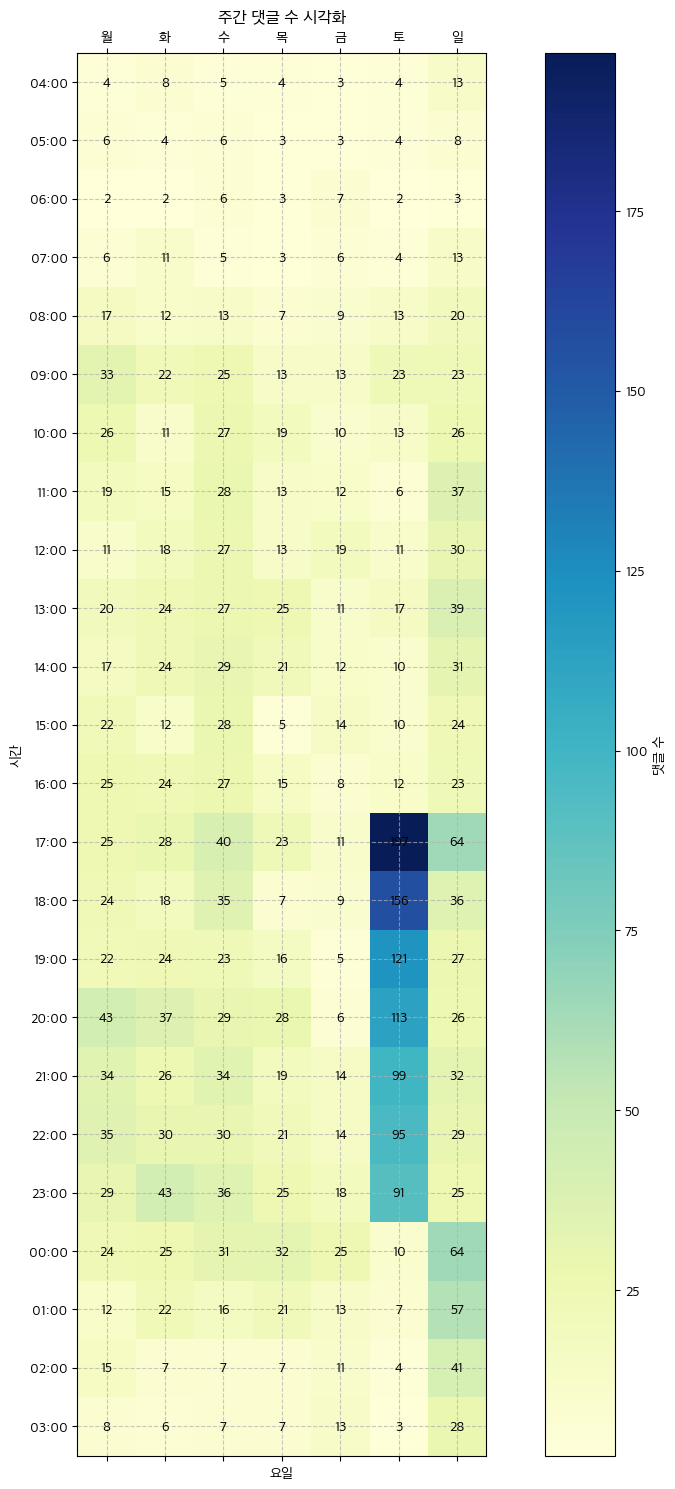

In [24]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import timezone



# 폴더 리스트
directories = ['디저스', '입시맘', '티처스 외전 및 티저']

# 모든 CSV 파일을 읽어서 데이터프레임에 저장
all_files = []

for directory in directories:
    # 각 폴더 내의 CSV 파일 경로를 찾음
    csv_files = glob.glob(os.path.join(directory, '*.csv'))
    # CSV 파일을 읽어서 데이터프레임 리스트에 추가
    for file in csv_files:
        df = pd.read_csv(file)
        all_files.append(df)

# 모든 데이터프레임을 하나로 병합
df = pd.concat(all_files, ignore_index=True) 

# UTC를 KST로 변환하는 함수
def utc_to_kst(utc_time):
    utc = timezone('UTC')
    kst = timezone('Asia/Seoul')
    utc_dt = utc.localize(datetime.strptime(utc_time, '%Y-%m-%dT%H:%M:%SZ'))
    kst_dt = utc_dt.astimezone(kst)
    return kst_dt

# 'Published At' 열을 UTC에서 KST로 변환
df['Published At'] = df['Published At'].apply(utc_to_kst)

# 1. 타임테이블 생성
def create_timetable():
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    hours = list(range(4, 24)) + list(range(0, 4))
    timetable = {day: [0] * 24 for day in days}
    return timetable

# 2. 댓글 수를 타임테이블에 매핑
def map_comments_to_timetable(df, timetable):
    df['Published At'] = pd.to_datetime(df['Published At'])
    for comment_time in df['Published At']:
        day = comment_time.strftime('%a')
        hour = comment_time.hour
        if hour < 4:
            hour += 24
        # 인덱스 범위를 벗어나지 않도록 조정
        if hour >= 24:
            hour -= 24
        if day in timetable:
            timetable[day][hour] += 1

# 3. 시각화 함수
def visualize_timetable(timetable):
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    hours = list(range(4, 24)) + list(range(0, 4))
    
    # 댓글 수 배열 준비
    counts = np.array([[timetable[day][hour] for day in days] for hour in hours])

    # 시각화
    fig, ax = plt.subplots(figsize=(12, 15))
    cax = ax.matshow(counts, cmap='YlGnBu')

    # x축, y축 레이블 설정
    ax.set_xticks(np.arange(len(days)))
    ax.set_yticks(np.arange(len(hours)))
    ax.set_xticklabels(['월', '화', '수', '목', '금', '토', '일'])
    ax.set_yticklabels([f"{h:02d}:00" for h in hours])

    # 각 셀에 댓글 수 표시
    for i in range(len(hours)):
        for j in range(len(days)):
            ax.text(j, i, counts[i, j], ha='center', va='center', color='black')

    plt.xlabel('요일')
    plt.ylabel('시간')
    plt.title('주간 댓글 수 시각화')
    plt.colorbar(cax, label='댓글 수')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 메인 실행 코드
timetable = create_timetable()
map_comments_to_timetable(df, timetable)
visualize_timetable(timetable)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Author        297 non-null    object
 1   Comment       298 non-null    object
 2   Likes         298 non-null    int64 
 3   Published At  298 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.4+ KB
None


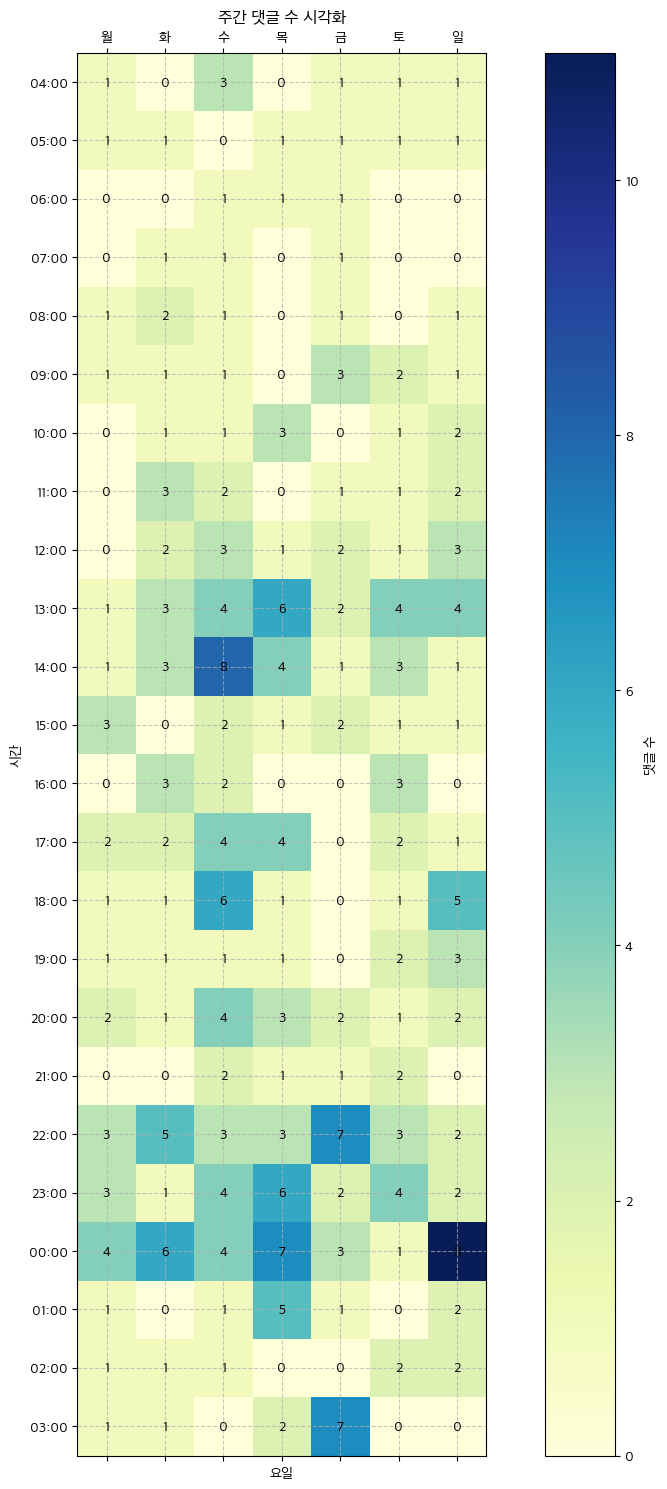

In [27]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import timezone



# 폴더 리스트
directories = ['디저스', '입시맘', '티처스 외전 및 티저']

# 모든 CSV 파일을 읽어서 데이터프레임에 저장
all_files = []

for directory in directories:
    # 각 폴더 내의 CSV 파일 경로를 찾음
    csv_files = glob.glob(os.path.join(directory, '*.csv'))
    # CSV 파일을 읽어서 데이터프레임 리스트에 추가
    for file in csv_files:
        df = pd.read_csv(file)
        all_files.append(df)

# 모든 데이터프레임을 하나로 병합
df = pd.concat(all_files, ignore_index=True) 

df = pd.read_csv('티처스 외전 및 티저/jv3oaNyEFhM.csv')
print(df.info())
# UTC를 KST로 변환하는 함수
def utc_to_kst(utc_time):
    utc = timezone('UTC')
    kst = timezone('Asia/Seoul')
    utc_dt = utc.localize(datetime.strptime(utc_time, '%Y-%m-%dT%H:%M:%SZ'))
    kst_dt = utc_dt.astimezone(kst)
    return kst_dt

# 'Published At' 열을 UTC에서 KST로 변환
df['Published At'] = df['Published At'].apply(utc_to_kst)

# 1. 타임테이블 생성
def create_timetable():
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    hours = list(range(4, 24)) + list(range(0, 4))
    timetable = {day: [0] * 24 for day in days}
    return timetable

# 2. 댓글 수를 타임테이블에 매핑
def map_comments_to_timetable(df, timetable):
    df['Published At'] = pd.to_datetime(df['Published At'])
    for comment_time in df['Published At']:
        day = comment_time.strftime('%a')
        hour = comment_time.hour
        if hour < 4:
            hour += 24
        # 인덱스 범위를 벗어나지 않도록 조정
        if hour >= 24:
            hour -= 24
        if day in timetable:
            timetable[day][hour] += 1

# 3. 시각화 함수
def visualize_timetable(timetable):
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    hours = list(range(4, 24)) + list(range(0, 4))
    
    # 댓글 수 배열 준비
    counts = np.array([[timetable[day][hour] for day in days] for hour in hours])

    # 시각화
    fig, ax = plt.subplots(figsize=(12, 15))
    cax = ax.matshow(counts, cmap='YlGnBu')

    # x축, y축 레이블 설정
    ax.set_xticks(np.arange(len(days)))
    ax.set_yticks(np.arange(len(hours)))
    ax.set_xticklabels(['월', '화', '수', '목', '금', '토', '일'])
    ax.set_yticklabels([f"{h:02d}:00" for h in hours])

    # 각 셀에 댓글 수 표시
    for i in range(len(hours)):
        for j in range(len(days)):
            ax.text(j, i, counts[i, j], ha='center', va='center', color='black')

    plt.xlabel('요일')
    plt.ylabel('시간')
    plt.title('주간 댓글 수 시각화')
    plt.colorbar(cax, label='댓글 수')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 메인 실행 코드
timetable = create_timetable()
map_comments_to_timetable(df, timetable)
visualize_timetable(timetable)